<a href="https://colab.research.google.com/github/Ashishsahu26/Customer-Support-Ticket-Operations-Analysis/blob/main/customer_support_tickets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np

path = '/content/drive/MyDrive/Projects_dataset/Customer_support_ticketss.csv'  # replace with your local path if needed
df = pd.read_csv(path, encoding='latin1')


In [13]:
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1.0,Marisa Obrien,carrollallison@example.com,32.0,Other,GoPro Hero,3/22/2021,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,NaN,NaN,NaN
1,2.0,Jessica Rios,clarkeashley@example.com,42.0,Female,LG Smart TV,5/22/2021,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,NaN,NaN,NaN
2,3.0,Christopher Robbins,gonzalestracy@example.com,48.0,Other,Dell XPS,7/14/2020,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,NaN,NaN,3.0
3,4.0,Christina Dillon,bradleyolson@example.org,27.0,Female,Microsoft Office,11/13/2020,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,NaN,NaN,3.0
4,5.0,Alexander Carroll,bradleymark@example.com,67.0,Female,Autodesk AutoCAD,2/4/2020,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,NaN,NaN,1.0


In [6]:
list = df.columns
print(list)
print(list.shape)
print(df.shape)

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')
(17,)
(8469, 17)


In [12]:
# Drop rows where Ticket ID is NaN or null
df = df.dropna(subset=['Ticket ID'])


In [14]:
print(df.shape)

(4999, 17)


In [15]:
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1.0,Marisa Obrien,carrollallison@example.com,32.0,Other,GoPro Hero,3/22/2021,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,NaN,NaN,NaN
1,2.0,Jessica Rios,clarkeashley@example.com,42.0,Female,LG Smart TV,5/22/2021,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,NaN,NaN,NaN
2,3.0,Christopher Robbins,gonzalestracy@example.com,48.0,Other,Dell XPS,7/14/2020,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,NaN,NaN,3.0
3,4.0,Christina Dillon,bradleyolson@example.org,27.0,Female,Microsoft Office,11/13/2020,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,NaN,NaN,3.0
4,5.0,Alexander Carroll,bradleymark@example.com,67.0,Female,Autodesk AutoCAD,2/4/2020,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,NaN,NaN,1.0


In [16]:
# Drop rows with missing Ticket ID
df.dropna(subset=['Ticket ID'], inplace=True)

# Convert time columns to numeric
df['First Response Time'] = pd.to_numeric(df['First Response Time'], errors='coerce')
df['Time to Resolution'] = pd.to_numeric(df['Time to Resolution'], errors='coerce')




In [17]:
print(df.shape)

(4999, 17)


In [18]:
# Handle missing values (numeric)
df.fillna(df.median(numeric_only=True), inplace=True)

# Remove duplicates (if any)
df.drop_duplicates(inplace=True)

print(df.isnull().sum())

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      3376
Ticket Priority                    0
Ticket Channel                     0
First Response Time             4999
Time to Resolution              4999
Customer Satisfaction Rating       0
dtype: int64


In [25]:
df1 =df.dropna(subset= ['Resolution'])

In [22]:
print(df.dropna(subset = ['Resolution'])['Resolution'])

2            Case maybe show recently my computer follow.
3           Try capital clearly never color toward story.
4                             West decision evidence bit.
10                  Measure tonight surface feel forward.
11      Measure there house management pick knowledge ...
                              ...                        
4989                     Third husband matter throughout.
4990      Discussion street also along affect scene wish.
4992                      Later police opportunity court.
4993                                 It shoulder prepare.
4996          Next wish marriage some interest need dark.
Name: Resolution, Length: 1623, dtype: object


In [26]:
print(df1.shape)

(1623, 17)


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

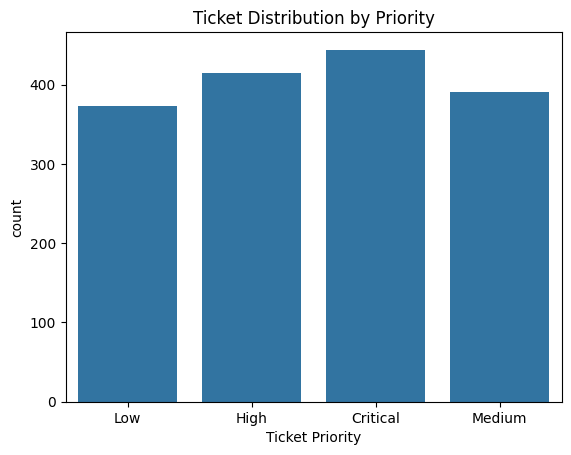

In [28]:
sns.countplot(x='Ticket Priority', data=df1)
plt.title("Ticket Distribution by Priority")
plt.show()


In [32]:
# random seed for reproducibility
np.random.seed(42)

# Example: based on priority column
def generate_resolution_time(priority):

    if priority == "High":
        return np.random.randint(1, 5)   # 1–4 hours
    elif priority == "Medium":
        return np.random.randint(4, 12)  # 4–11 hours
    else:
        return np.random.randint(8, 24)  # 8–23 hours

# apply function
df1['resolution_time_hours'] = df1['Ticket Priority'].apply(generate_resolution_time)



/tmp/ipython-input-142457887.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['resolution_time_hours'] = df1['Ticket Priority'].apply(generate_resolution_time)


In [35]:
df1[['Resolution','resolution_time_hours']].head()

,Resolution,resolution_time_hours
2,Case maybe show recently my computer follow.,14
3,Try capital clearly never color toward story.,11
4,West decision evidence bit.,20
10,Measure tonight surface feel forward.,3
11,Measure there house management pick knowledge ...,3


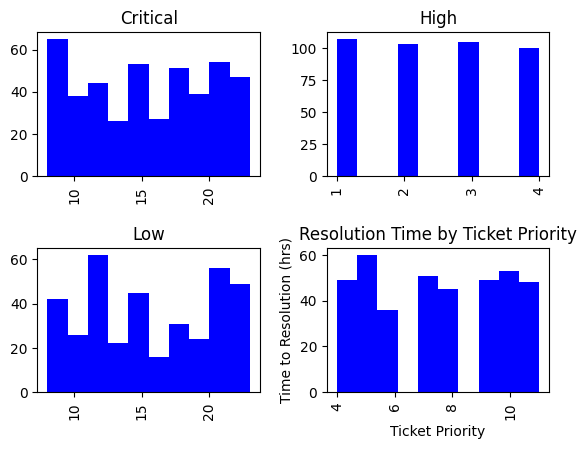

In [49]:
df1.hist(
    column='resolution_time_hours',
    by='Ticket Priority',
    color = 'blue',
    grid=True
)

plt.title("Resolution Time by Ticket Priority")
plt.suptitle("")
plt.xlabel("Ticket Priority")
plt.ylabel("Time to Resolution (hrs)")
plt.show()


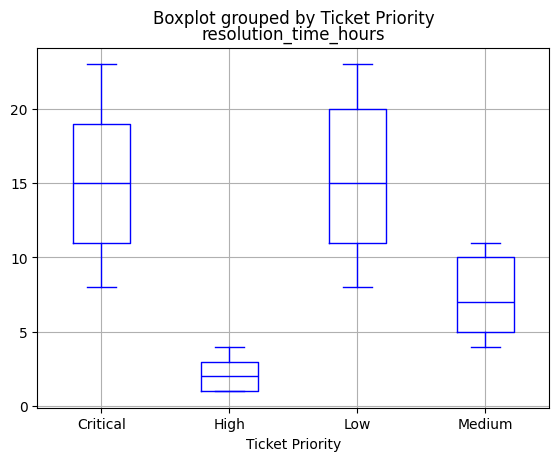

In [52]:
df1.boxplot(
    column='resolution_time_hours',
    by='Ticket Priority',
    color = 'blue',
    grid=True


)
plt.show()

In [50]:
plot_df = df1.dropna(subset=['Time to Resolution', 'Ticket Priority'])



In [53]:
#  Ticket Volume Analysis
#  Ticket Priority distribution
#  Ticket Channel analysis
#  Ticket Status breakdown
#  Customer Demographics
#  Satisfaction Rating analysis (if available

In [44]:
df1['Ticket Priority'].value_counts()


,count
Ticket Priority,
Critical,444
High,415
Medium,391
Low,373


In [45]:
df1['Ticket Status'].value_counts(normalize=True) * 100


,proportion
Ticket Status,
Closed,100.0


In [46]:
df1.groupby('Ticket Channel')['Ticket ID'].count()


,Ticket ID
Ticket Channel,
Chat,419
Email,407
Phone,406
Social media,391


In [36]:
df1['Customer Satisfaction Rating'].value_counts()


,count
Customer Satisfaction Rating,
5.0,334
3.0,332
1.0,323
2.0,319
4.0,315
